# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime

#sets the time
now = datetime.datetime.now()

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [22]:
print ("Current date and time using strftime:")
when=now.strftime("%Y-%m-%d")
when


Current date and time using strftime:


'2019-09-21'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [4]:
cities

['qaanaaq',
 'omboue',
 'punta arenas',
 'puerto ayora',
 'zeerust',
 'lapao',
 'mar del plata',
 'new norfolk',
 'lebu',
 'kot addu',
 'zhezkazgan',
 'kodiak',
 'albany',
 'gazli',
 'porto torres',
 'mataura',
 'nikolskoye',
 'aksarayskiy',
 'saint-philippe',
 'viedma',
 'cherskiy',
 'kruisfontein',
 'leshukonskoye',
 'lagoa',
 'lavrentiya',
 'illoqqortoormiut',
 'nelson bay',
 'zaozerne',
 'asau',
 'hasaki',
 'paamiut',
 'faanui',
 'bathsheba',
 'kaitangata',
 'dharchula',
 'saint george',
 'uncia',
 'itoman',
 'kraskino',
 'vaini',
 'prince rupert',
 'san quintin',
 'cape town',
 'dudinka',
 'ribeira grande',
 'rikitea',
 'college',
 'senmonorom',
 'vestmannaeyjar',
 'severo-yeniseyskiy',
 'barrow',
 'cidreira',
 'attawapiskat',
 'sentyabrskiy',
 'santa marta',
 'avarua',
 'lodja',
 'bethel',
 'hauge',
 'champasak',
 'kerman',
 'ushuaia',
 'vao',
 'lokosovo',
 'taolanaro',
 'vila franca do campo',
 'tateyama',
 'banswara',
 'tsihombe',
 'port keats',
 'atuona',
 'ojinaga',
 'iberia'

In [42]:


# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
temp = []
cloudiness = []
country = []
date = []
humidity = []
long =[]
high_temp =[]
wind = []
city_number =[]
da_count=0
fresh_city = []
city_number= []


print("Beginning Data Retrieval")
print("------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    print(f"Processing Record for: {city}")
    try:
        da_count=da_count+1
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        high_temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed']) 
        fresh_city.append(response['name'])
        city_number.append(response['id'])
    except:
        print("Fuck! City not found!")
        da_count=da_count -1
        pass
print("Operation Complete")
print("------------------")

    



Beginning Data Retrieval
------------------------
Processing Record for: qaanaaq
Processing Record for: omboue
Processing Record for: punta arenas
Processing Record for: puerto ayora
Processing Record for: zeerust
Processing Record for: lapao
Processing Record for: mar del plata
Processing Record for: new norfolk
Processing Record for: lebu
Processing Record for: kot addu
Processing Record for: zhezkazgan
Processing Record for: kodiak
Processing Record for: albany
Processing Record for: gazli
Processing Record for: porto torres
Processing Record for: mataura
Processing Record for: nikolskoye
Processing Record for: aksarayskiy
Processing Record for: saint-philippe
Processing Record for: viedma
Processing Record for: cherskiy
Processing Record for: kruisfontein
Processing Record for: leshukonskoye
Processing Record for: lagoa
Processing Record for: lavrentiya
Processing Record for: illoqqortoormiut
Fuck! City not found!
Processing Record for: nelson bay
Processing Record for: zaozerne
Pr

Processing Record for: ruatoria
Fuck! City not found!
Processing Record for: avera
Processing Record for: itarema
Processing Record for: yulara
Processing Record for: khandyga
Processing Record for: harper
Processing Record for: leningradskiy
Processing Record for: birchis
Processing Record for: ponta do sol
Processing Record for: hirara
Processing Record for: sulangan
Processing Record for: meshchovsk
Processing Record for: tadine
Processing Record for: shitanjing
Processing Record for: mount isa
Processing Record for: salinopolis
Processing Record for: meridian
Processing Record for: villarrica
Processing Record for: codrington
Processing Record for: amahai
Processing Record for: chadiza
Processing Record for: saint-francois
Processing Record for: banjar
Processing Record for: kapoeta
Fuck! City not found!
Processing Record for: igrim
Processing Record for: palabuhanratu
Fuck! City not found!
Processing Record for: fort-shevchenko
Processing Record for: barreirinha
Processing Record 

Processing Record for: verkhnevilyuysk
Processing Record for: wattegama
Processing Record for: valleyview
Processing Record for: flin flon
Processing Record for: roald
Processing Record for: praya
Processing Record for: pierre
Processing Record for: maniitsoq
Processing Record for: sao gotardo
Processing Record for: roma
Processing Record for: viligili
Fuck! City not found!
Processing Record for: abu jubayhah
Fuck! City not found!
Processing Record for: san jeronimo
Processing Record for: raudeberg
Processing Record for: kamenskoye
Fuck! City not found!
Processing Record for: tromso
Processing Record for: hecun
Processing Record for: kiruna
Processing Record for: cardston
Processing Record for: taltal
Processing Record for: sayville
Processing Record for: ketchikan
Processing Record for: goya
Processing Record for: olenino
Processing Record for: stephenville crossing
Processing Record for: east chicago
Processing Record for: los llanos de aridane
Processing Record for: santa cruz de te

In [6]:
da_count

555

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#Perform a weather check on each city using a series of successive API calls.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#Make a data from from the gathered weather info
weather_data = {
    "City": fresh_city,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Temperature": high_temp,
    "Latitude": lat,
    "Longitude": long,   
    "Wind Speed": wind}

weather_data_df = pd.DataFrame(weather_data)
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Temperature,Latitude,Longitude,Wind Speed
0,Qaanaaq,0,GL,1569077697,36,23.30,77.48,-69.36,7.49
1,Omboue,81,GA,1569077697,86,77.12,-1.57,9.26,15.10
2,Punta Arenas,20,CL,1569077697,75,42.80,-53.16,-70.91,25.28
3,Puerto Ayora,90,EC,1569077408,64,69.80,-0.74,-90.35,13.87
4,Zeerust,0,ZA,1569077698,10,87.80,-25.54,26.07,13.87


In [10]:
#weather_data_df.count()

In [11]:
weather_data_df

,City,Cloudiness,Country,Date,Humidity,Temperature,Latitude,Longitude,Wind Speed
0,Qaanaaq,0,GL,1569077697,36,23.30,77.48,-69.36,7.49
1,Omboue,81,GA,1569077697,86,77.12,-1.57,9.26,15.10
2,Punta Arenas,20,CL,1569077697,75,42.80,-53.16,-70.91,25.28
3,Puerto Ayora,90,EC,1569077408,64,69.80,-0.74,-90.35,13.87
4,Zeerust,0,ZA,1569077698,10,87.80,-25.54,26.07,13.87
5,Lapao,0,BR,1569077698,21,90.98,-11.38,-41.83,11.16
6,Mar del Plata,1,AR,1569077698,22,51.74,-46.43,-67.52,24.58
7,New Norfolk,40,AU,1569077698,82,50.00,-42.78,147.06,16.11
8,Lebu,100,ET,1569077699,85,61.10,8.96,38.73,2.33
9,Kot Addu,20,PK,1569077699,59,91.40,30.47,70.97,2.28


In [12]:
#Export the data frame to CSV
weather_data_df.to_csv(output_data_file)

In [13]:
weather_data_df


,City,Cloudiness,Country,Date,Humidity,Temperature,Latitude,Longitude,Wind Speed
0,Qaanaaq,0,GL,1569077697,36,23.30,77.48,-69.36,7.49
1,Omboue,81,GA,1569077697,86,77.12,-1.57,9.26,15.10
2,Punta Arenas,20,CL,1569077697,75,42.80,-53.16,-70.91,25.28
3,Puerto Ayora,90,EC,1569077408,64,69.80,-0.74,-90.35,13.87
4,Zeerust,0,ZA,1569077698,10,87.80,-25.54,26.07,13.87
5,Lapao,0,BR,1569077698,21,90.98,-11.38,-41.83,11.16
6,Mar del Plata,1,AR,1569077698,22,51.74,-46.43,-67.52,24.58
7,New Norfolk,40,AU,1569077698,82,50.00,-42.78,147.06,16.11
8,Lebu,100,ET,1569077699,85,61.10,8.96,38.73,2.33
9,Kot Addu,20,PK,1569077699,59,91.40,30.47,70.97,2.28


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

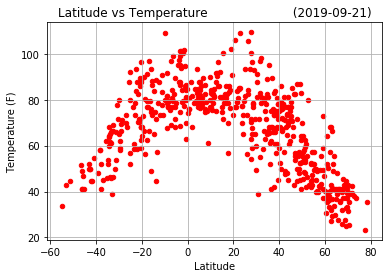

In [41]:
#Latitude Vs Temperature Plot
weather_data_df.plot(kind='scatter', x='Latitude', y='Temperature', c='Red')

plt.title('Latitude vs Temperature                      '+ '('+ when +')')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

plt.grid()

plt.savefig("../Images/LatitudeVsTemperature.png")

In [ ]:
#Observable Trends for Latitude vs Temperature
#Temperatures close to the equater tend to be higher and as you move away from the the equator, 
#both North and South, the temperatures drop.  
#Additionally, the equater is not the "center point" for this, the center point (for this phenonmeon) is actually 
#closer to about 10 degrees latitude.

#### Latitude vs. Humidity Plot

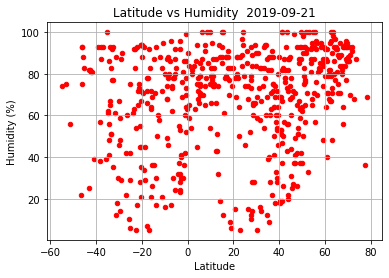

In [30]:
#Latitude Vs Humidity Plot
weather_data_df.plot(kind='scatter',x='Latitude',y='Humidity', c='Red')

plt.title('Latitude vs Humidity  '+ when)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.grid()

plt.savefig("../Images/LatitudeVsHumidity.png")

In [ ]:
#Observable Trends for Latitude vs Humidity
#During this slice of time, there wasn't a strong trend regarding this relationship.  
#At the very extremes of latitude -60 and 80,there tend not be much humidity. 

#### Latitude vs. Cloudiness Plot

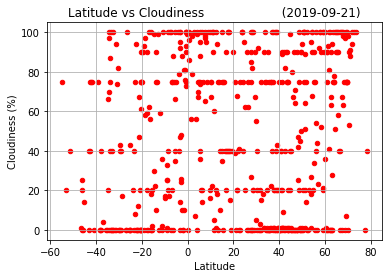

In [40]:
#Latitude Vs Cloudiness Plot
weather_data_df.plot(kind='scatter',x='Latitude',y='Cloudiness', c='Red')

plt.title('Latitude vs Cloudiness                    '+ '('+ when +')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.grid()

plt.savefig("../Images/LatitudeVsCloudiness.png")

In [ ]:
#Observable Trends for Latitude vs Cloudiness
#At first glace, it apprears that there are patterns, however the striation in the chart is due
#to the pre-determined cloudiness bucks, such as "Partly Cloudly, Cloudy, Not Cloudly,  
#There are no trends in regarding latitude and cloudiness, the distribution is fairly even.

#### Latitude vs. Wind Speed Plot

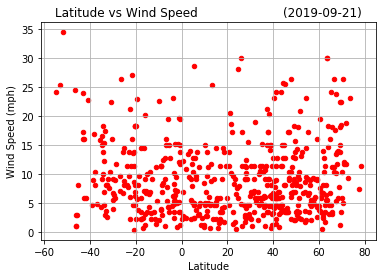

In [39]:
#Latitude Vs Wind Speed Plot
weather_data_df.plot(kind='scatter',x='Latitude',y='Wind Speed', c='Red')

plt.title('Latitude vs Wind Speed                      '+ '('+ when +')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.grid()

plt.savefig("../Images/LatitudeVsWindSpeed.png")

In [ ]:
#Trends in Latitude vs Wind Speed
#While wind speed has some extreme data points, there is a fairly even distribution of wind speeds across the latitudes.
#There is no strong trend in this data set. 